In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('drug_data.csv')

In [3]:
# Preprocess the data
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['BP'] = le.fit_transform(data['BP'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])
data['Drug'] = le.fit_transform(data['Drug'])

X = data.drop('Drug', axis=1)
y = data['Drug']

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 1. Decision Tree with hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
dt_accuracy = accuracy_score(y_test, best_dt.predict(X_test))

print(f"Best Decision Tree parameters: {grid_search.best_params_}")
print(f"Decision Tree accuracy: {dt_accuracy:.4f}")

Best Decision Tree parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree accuracy: 1.0000


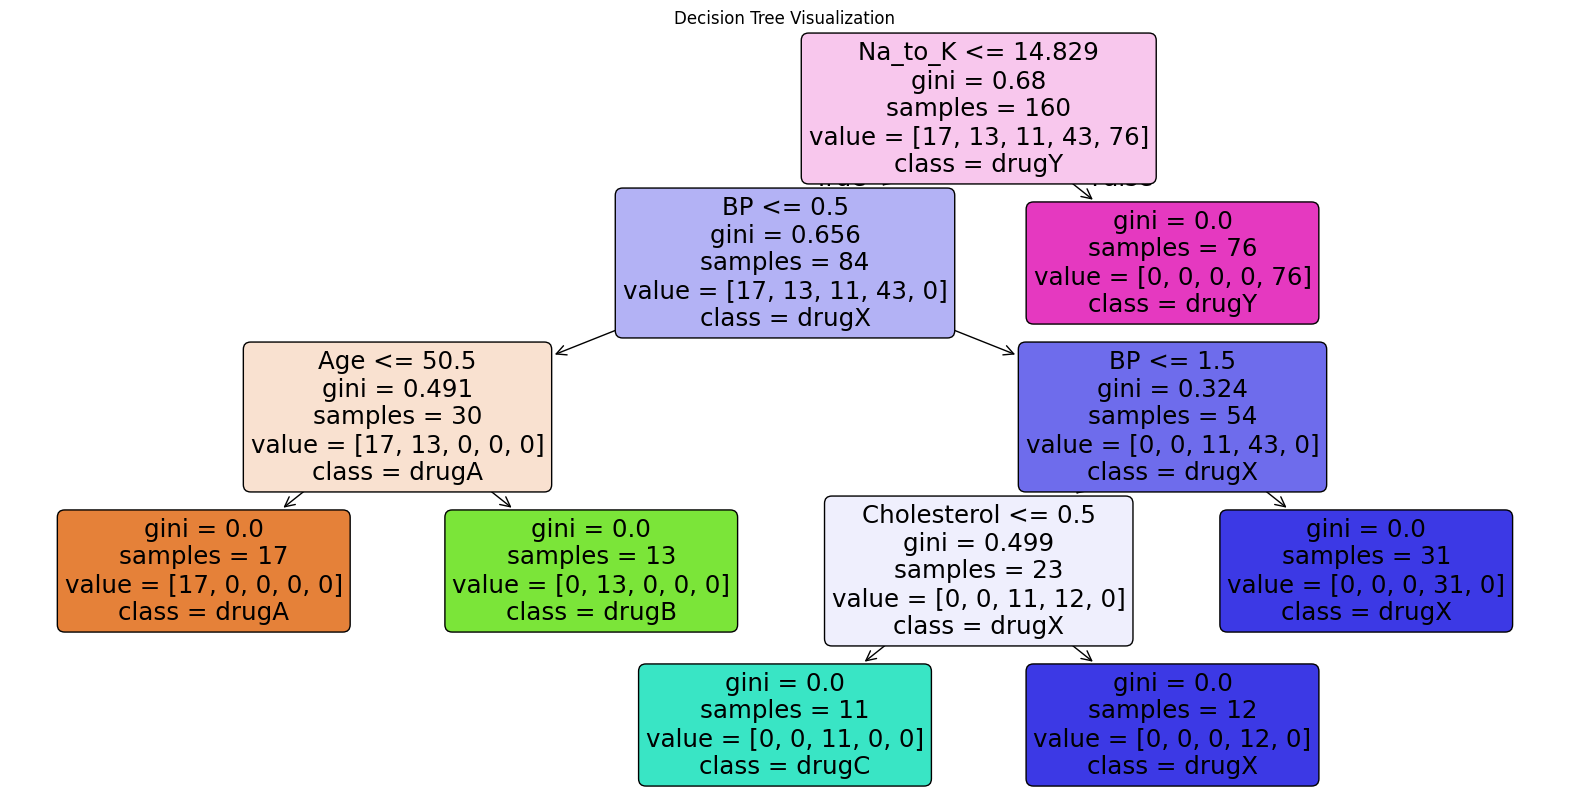

In [6]:
# 2. Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [7]:
# 3. Bayesian classification (using Gaussian Naive Bayes)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_accuracy = accuracy_score(y_test, gnb.predict(X_test))

print(f"Gaussian Naive Bayes accuracy: {gnb_accuracy:.4f}")

Gaussian Naive Bayes accuracy: 0.9250


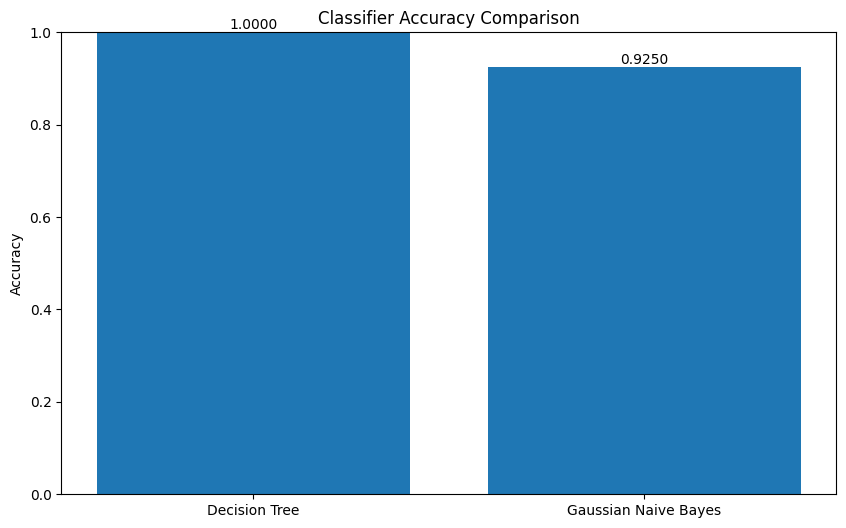

In [8]:
# 4. Plot the accuracy of both classifiers
plt.figure(figsize=(10,6))
plt.bar(['Decision Tree', 'Gaussian Naive Bayes'], [dt_accuracy, gnb_accuracy])
plt.title('Classifier Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate([dt_accuracy, gnb_accuracy]):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.show()

In [9]:
# Predict for the given parameters
new_patient = pd.DataFrame([[43, 0, 0, 1, 15.376]], columns=X.columns)
dt_prediction = le.inverse_transform(best_dt.predict(new_patient))[0]
gnb_prediction = le.inverse_transform(gnb.predict(new_patient))[0]

print(f"Decision Tree prediction for the new patient: {dt_prediction}")
print(f"Gaussian Naive Bayes prediction for the new patient: {gnb_prediction}")

Decision Tree prediction for the new patient: drugY
Gaussian Naive Bayes prediction for the new patient: drugA
